In [2]:
import BenchmarkTools: @btime, @benchmark;

import Pkg: activate, build
activate("../GSHEIntegrator/.")
import GSHEIntegrator;


import Plots
using LaTeXStrings
using Measures
using NPZ
using EllipsisNotation

  Activating project at `~/Projects/birefringence/GSHEIntegrator`
┌ Info: Precompiling GSHEIntegrator [95376d2f-314f-47c4-97a6-da6eee6a3a26]
└ @ Base loading.jl:1423


# 1. Extreme case

In [3]:
runID = "13"

ϵs = npzread("../data/run_$runID/Epsilons.npy")
rsource = 10.0
θsource = 0.5π
ϕsource = 0.0

robs = 100.0
θobs = 0.4π
ϕobs = π


as = 0.99

postproc_options = GSHEIntegrator.PostprocOptions(check_sols=true)
ode_options = GSHEIntegrator.ODESolverOptions(Δθ=0.00001, horizon_tol=1.0001, no_loops=false, maxiters=10000)
opt_options = GSHEIntegrator.OptimiserOptions(Nconsec=20)


geometry = GSHEIntegrator.setup_geometry(Float64;
   rsource=rsource, θsource=θsource, ϕsource=ϕsource,
   robs=robs, θobs=θobs, ϕobs=ϕobs, a=as, s=2, postproc_options=postproc_options, ode_options=ode_options);

In [109]:
Xgeos = npzread("../data/run_$runID/Xgeos.npy")
Xgshes = npzread("../data/run_$runID/Xgshes.npy")
αs = npzread("../data/run_$runID/alphas.npy")
βs = npzread("../data/run_$runID/betas.npy");
kx = npzread("../data/run_$runID/dir1.npy");
ky = npzread("../data/run_$runID/dir2.npy");

dirs = GSHEIntegrator.make_2dmesh(kx, ky)


m1 = sqrt.(reshape(mapslices(sum, dirs.^2, dims=2), size(dirs,1 ))) .< 1
m2 = (dirs[:, 2] .> 0.0) .&& (dirs[:, 2] .< 0.8)
m3 = .~isnan.(βs[:, 1])
# m4 = abs.((βs[:, 1] .- 2)) .< 0.5
m4 = true
m5 = abs.(dirs[:, 1]) .< 0.5
m6 = Xgshes[:, end, 6] .> 1
# m6 = true

m = m1 .&& m2 .&& m3 .&& m4 .&& m5 .&& m6

println(sum(m))

ps = [i for i in 1:size(dirs, 1) if m[i]]

Plots.scatter(dirs[m, 2], dirs[m, 1], xlim=(0,1), ylim=(-1,1))

500-element Vector{Float64}:
 -1.0
 -0.9959919839679359
 -0.9919839679358717
 -0.9879759519038076
 -0.9839679358717435
 -0.9799599198396793
 -0.9759519038076152
 -0.9719438877755511
 -0.9679358717434869
 -0.9639278557114228
  ⋮
  0.9679358717434869
  0.9719438877755511
  0.9759519038076152
  0.9799599198396793
  0.9839679358717435
  0.9879759519038076
  0.9919839679358717
  0.9959919839679359
  1.0

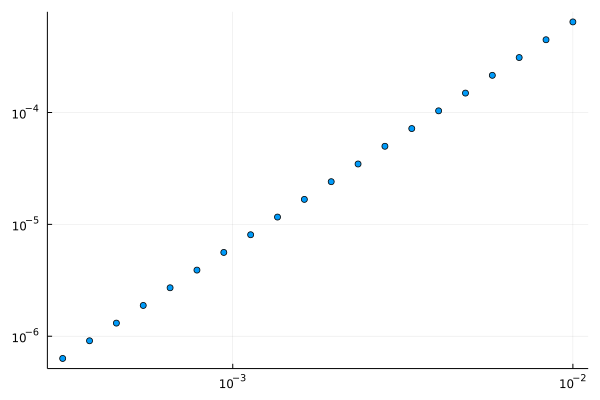

αs = [2.005095325878761, 0.0007527653424333501]
βs = [6.570208698892591, 0.032937443385330965]
[1.3709877492205944, 2.9164466884694864, 173.0032661952089, 1.1067975960152634, 1.0393673829381705e-13, 3.0, 1.7755677084108228, 1.0]


In [114]:
GSHEIntegrator.shuffle!(ps)
i = ps[1]

# i = 160294
# println(i)
println("αs = $(αs[i, :])")
println("βs = $(βs[i, :])")

Xgshe = Xgshes[i, ..]
Xgeo = Xgeos[i, ..]
println(Xgeo)

ϵs = npzread("../data/run_$runID/Epsilons.npy")

dt = abs.(Xgshes[i, :, 3] .- Xgeos[i, 3])
fig = Plots.scatter(ϵs, dt, yscale=:log10, xscale=:log10, legend=nothing)

# Plots.savefig(fig, "~/Downloads/dts.png")

display(fig)

In [116]:
dir = dirs[i, :]
ϵs = (10).^(LinRange(-3, -1, 30))

X0 = GSHEIntegrator.time_initial!(dir, ϵs[end], 2, geometry, true)
Xgeo, Xgshe = GSHEIntegrator.time_gshe(X0, geometry, ϵs, 2, false)

sol = GSHEIntegrator.solve_problem(Xgshe[end, 1:2], geometry, ϵs[end], 2)
geometry.observer.θ = sol[3, 2]
geometry.observer.ϕ = sol[4, 2]

3.33%, ϵ=1.00e-01 

6.67%, ϵ=8.53e-02 

10.00%, ϵ=7.28e-02 

13.33%, ϵ=6.21e-02 

16.67%, ϵ=5.30e-02 

20.00%, ϵ=4.52e-02 

23.33%, ϵ=3.86e-02 

26.67%, ϵ=3.29e-02 

30.00%, ϵ=2.81e-02 

33.33%, ϵ=2.40e-02 

36.67%, ϵ=2.04e-02 

40.00%, ϵ=1.74e-02 

43.33%, ϵ=1.49e-02 

46.67%, ϵ=1.27e-02 

50.00%, ϵ=1.08e-02 

53.33%, ϵ=9.24e-03 

56.67%, ϵ=7.88e-03 

60.00%, ϵ=6.72e-03 

63.33%, ϵ=5.74e-03 

66.67%, ϵ=4.89e-03 

70.00%, ϵ=4.18e-03 

73.33%, ϵ=3.56e-03 

76.67%, ϵ=3.04e-03 

80.00%, ϵ=2.59e-03 

83.33%, ϵ=2.21e-03 

86.67%, ϵ=1.89e-03 

90.00%, ϵ=1.61e-03 

93.33%, ϵ=1.37e-03 

96.67%, ϵ=1.17e-03 

100.00%, ϵ=1.00e-03 

17.843633365587834

In [117]:
αs, βs = GSHEIntegrator.fit_Δts(ϵs, Xgshe, Xgeo, geometry)

Dict{String, Vector{Float64}} with 2 entries:
  "alpha" => [1.99283, 0.00111542]
  "beta"  => [2.78419, 0.01606]

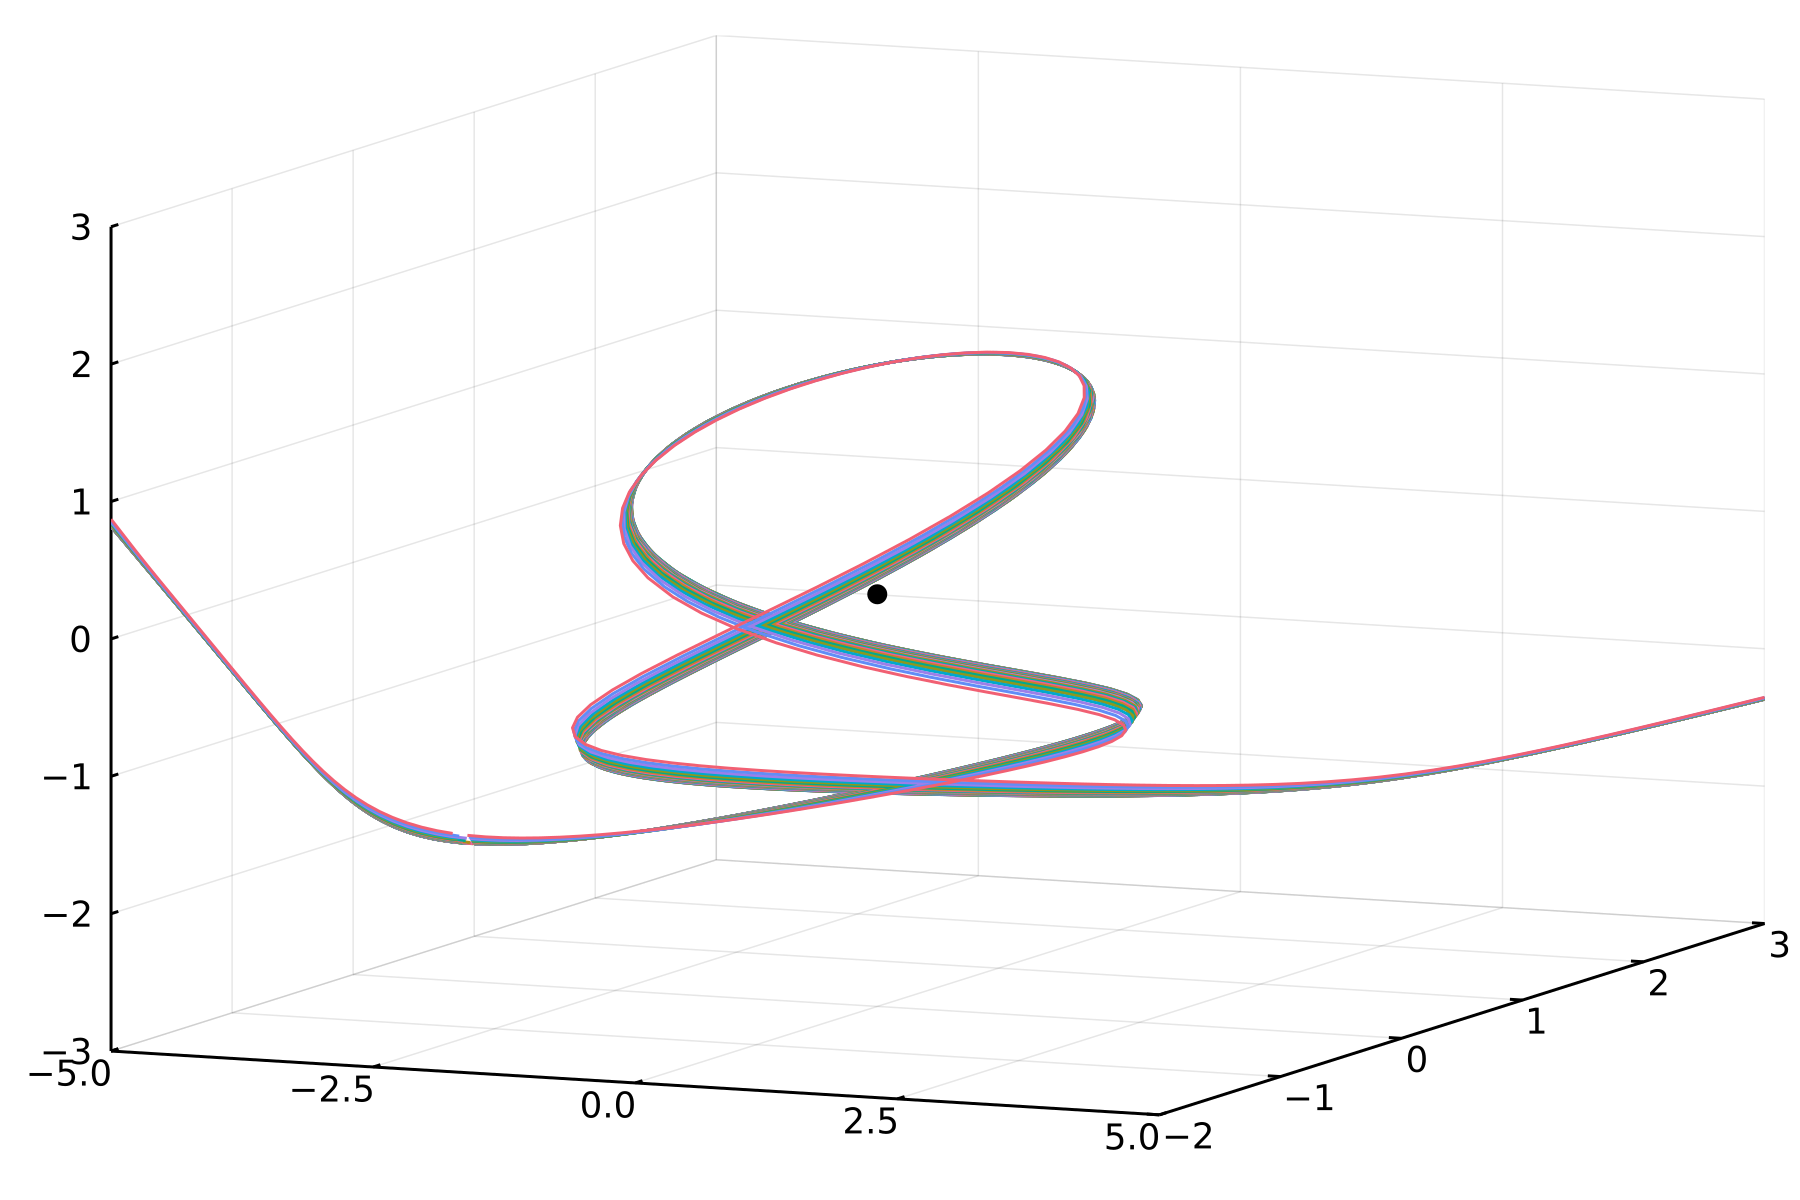

In [124]:
transform(x::Vector{<:Real}) = GSHEIntegrator.spherical_to_cartesian(x, geometry.a)
fig = Plots.plot(xlim=(-5, 5), ylim=(-2,3), zlim=(-3,3), legend=nothing, dpi=300)
# fig = Plots.plot(legend=nothing, dpi=300)

for j in 1:size(Xgshe, 1)
    if any(isnan.(Xgshe[j, 1:2]))
        continue
    end
    sol = GSHEIntegrator.solve_problem(
        Xgshe[j, 1:2], geometry, ϵs[j], 2; save_everystep=true)
    tr = mapslices(transform, sol[2:4, :], dims=1)
    Plots.plot!(fig, [tr[i, :] for i in 1:3]...)
    # @show maximum(sol[3, :]) ./ π
    # Plots.plot!(sol[1, :], sol[3, :] ./π )
end
Plots.scatter!(fig, (0, 0, 0), c="black", label="Black hole")

Plots.savefig(fig, "~/Downloads/sol.png")
display(fig)



In [33]:
ϵs = (10).^(LinRange(-3, -0.3, 100))
rsource = 4.
θsource = 0.5π
ϕsource = 0.0

robs = 50.0
θobs = 0.4π
ϕobs = 1π

as = 0.99

postproc_options = GSHEIntegrator.PostprocOptions(check_sols=true)
ode_options = GSHEIntegrator.ODESolverOptions(Δθ=0.00001, horizon_tol=1.0001, no_loops=true, maxiters=10000)
opt_options = GSHEIntegrator.OptimiserOptions(Nconsec=20)


geometry = GSHEIntegrator.setup_geometry(Float64;
   rsource=rsource, θsource=θsource, ϕsource=ϕsource,
   robs=robs, θobs=θobs, ϕobs=ϕobs, a=as, s=2, postproc_options=postproc_options, ode_options=ode_options);

In [36]:
Xgeo, Xgshe = GSHEIntegrator.solve_full(geometry, ϵs, true, 2)

n = 1
1.00%, ϵ=1.00e-03 2.00%, ϵ=1.06e-03 3.00%, ϵ=1.13e-03 4.00%, ϵ=1.21e-03 5.00%, ϵ=1.29e-03 6.00%, ϵ=1.37e-03 7.00%, ϵ=1.46e-03 8.00%, ϵ=1.55e-03 9.00%, ϵ=1.65e-03 10.00%, ϵ=1.76e-03 11.00%, ϵ=1.87e-03 12.00%, ϵ=2.00e-03 13.00%, ϵ=2.12e-03 14.00%, ϵ=2.26e-03 15.00%, ϵ=2.41e-03 16.00%, ϵ=2.57e-03 17.00%, ϵ=2.73e-03 18.00%, ϵ=2.91e-03 19.00%, ϵ=3.10e-03 20.00%, ϵ=3.30e-03 21.00%, ϵ=3.51e-03 22.00%, ϵ=3.74e-03 23.00%, ϵ=3.98e-03 24.00%, ϵ=4.24e-03 25.00%, ϵ=4.51e-03 26.00%, ϵ=4.81e-03 27.00%, ϵ=5.12e-03 28.00%, ϵ=5.45e-03 29.00%, ϵ=5.80e-03 30.00%, ϵ=6.18e-03 31.00%, ϵ=6.58e-03 32.00%, ϵ=7.01e-03 33.00%, ϵ=7.46e-03 34.00%, ϵ=7.94e-03 35.00%, ϵ=8.46e-03 36.00%, ϵ=9.01e-03 37.00%, ϵ=9.59e-03 38.00%, ϵ=1.02e-02 39.00%, ϵ=1.09e-02 40.00%, ϵ=1.16e-02 41.00%, ϵ=1.23e-02 42.00%, ϵ=1.31e-02 43.00%, ϵ=1.40e-02 44.00%, ϵ=1.49e-02 45.00%, ϵ=1.58e-02 46.00%, ϵ=1.69e-02 47.00%, ϵ=1.80e-02 48.00%, ϵ=1.91e-02 49.00%, ϵ=2.04e-02 50.00%, ϵ=2.17e-02 51.00%, ϵ=2.31e-02 52.00%, ϵ=2.46e-02 53.00%, ϵ=2.62e

([0.8052809087004614 4.293590860826584 … 2.236475145318851 4.0; 2.4179244412429615 1.554388434891219 … -3.8758770075607862 12.0], [0.8058258809266486 0.8047361318732216; 2.4189816474985424 2.4168671944603974;;; 0.8058612081324853 0.8047008308162868; 2.419050165215416 2.416798671320172;;; 0.8058988258500764 0.8046632427470745; 2.4191231234814135 2.4167257069047863;;; … ;;; 1.0708202823489925 0.5842807064334147; 2.8804424065131813 1.941475825690927;;; 1.0905237012900661 0.5716313920940904; 2.908940072307057 1.909584094086336;;; 1.1120395979970756 0.5584759272453973; 2.938346792757212 1.8754510248303504;;;; 4.293991905595082 4.293189254633252; 1.5539161965739057 1.5548600749624342;;; 4.294017878560285 4.293163206536099; 1.5538855693908928 1.5548906220858136;;; 4.294045532285743 4.293135467624363; 1.553852954437046 1.5549231462661675;;; … ;;; 4.431569903850455 4.037707301901172; 1.1672042260587756 1.732810463181601;;; 4.438782960177434 4.013431495789443; 1.10282364672603 1.7436795843784372

In [37]:
αs, βs = GSHEIntegrator.fit_Δts(ϵs, Xgshe, Xgeo, geometry)

2-element Vector{Any}:
 [Dict("alpha" => [2.0059292896709953, 0.0010855302102904165], "beta" => [0.7408472756528653, 0.003902413683457246]), Dict("alpha" => [2.0025541346198543, 0.0005359687116617125], "beta" => [0.7279861817787386, 0.001882115412894198])]
 [Dict("alpha" => [2.005169755438733, 0.0005604246254239549], "beta" => [1.30784165665634, 0.003435361111369439]), Dict("alpha" => [1.9971896476211473, 0.00016045441467144936], "beta" => [1.2530416943956018, 0.0008945604069998215])]

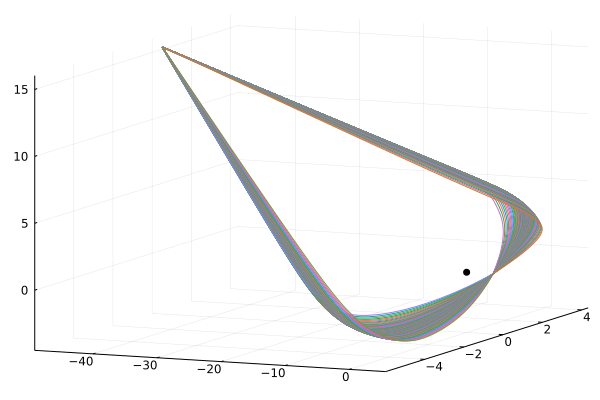

In [43]:
transform(x::Vector{<:Real}) = GSHEIntegrator.spherical_to_cartesian(x, geometry.a)
# fig = Plots.plot(xlim=(-5, 5), ylim=(-2,3), zlim=(-3,3), legend=nothing, dpi=300)
fig = Plots.plot(legend=nothing, dpi=300)



τGSHE = zeros(2, 2, length(ϵs))

for i in 1:2, s in 1:2, j in 1:size(Xgshe, 3)
    if any(isnan.(Xgshe[i, s, j, 1:2]))
        println("Skipping")
        continue
    end
#    println(ϵs[j])
    sol = GSHEIntegrator.solve_problem(
        Xgshe[i, s, j, 1:2], geometry, ϵs[j], s == 1 ? 2 : -2; save_everystep=true)
    τGSHE[i, s, j] = sol.t[end]
    tr = mapslices(transform, sol[2:4, :], dims=1)
    Plots.plot!(fig, [tr[i, :] for i in 1:3]...)
    # @show maximum(sol[3, :]) ./ π
    # Plots.plot!(sol[1, :], sol[3, :] ./π )
end
Plots.scatter!(fig, (0, 0, 0), c="black", label="Black hole")

Plots.savefig(fig, "~/Downloads/sol.png")
display(fig)


τgeo = zeros(2)

for i in 1:2
    sol = GSHEIntegrator.solve_problem(
        Xgeo[i, 1:2], geometry, 0, 0; save_everystep=true)
    τgeo[i] = sol.t[end]
end


In [49]:
function print_vector(f, x)
    print(f, "{")
    N = length(x)
    for i in 1:N
        print(f, x[i])
        if i != N
            print(f, ", ")
        end
    end
    print(f, "}")
end



fpath = "/Users/richard/Downloads/eps.txt"
open(fpath, "w") do f
    print(f, "epsilons = ")
    print_vector(f, ϵs)
    print(f, " \n \n")
end

for n in 1:2, s in 1:2
    fpath = "/Users/richard/Downloads/dirs_n$(n)_s$(s).txt"
    open(fpath, "w") do f
        print(f, "psi = ")
        print_vector(f, Xgshe[n, s, :, 1])
        print(f, " \n \n")

        print(f, "rho = ")
        print_vector(f, Xgshe[n, s, :, 2])
        print(f, "\n \n")

        print(f, "tauend = ")
        print_vector(f, τGSHE[n, s, :])
        print(f, "\n")
    end
end

In [28]:
geometry = GSHEIntegrator.setup_geometry(Float64;
   rsource=10, θsource=π/2, ϕsource=0,
   robs=100, θobs=0.5π, ϕobs=1π, a=0.99, s=2)


N = 2000
k2s = LinRange(-1, 1, N)
k3s = LinRange(-1, 1, N)

dirs = GSHEIntegrator.make_2dmesh(k2s, k3s)

mask = reshape(mapslices(x->sum(x) ≤ 1 , dirs.^2, dims=2), N^2)
iters = [i for i in 1:N^2 if mask[i]]
GSHEIntegrator.shuffle!(iters)
Z = fill(NaN, N^2)
loss = GSHEIntegrator.setup_initial_loss(geometry, 0, 2);

# Threads.@threads for i in iters
#     k2, k3 = dirs[i, :]
#     ψ = acos(k3)
#     ρ = π + asin(k2 / sqrt(1 - k3^2))
#     Z[i] = loss([ψ, ρ])
# end

In [30]:
Xgeo, Xgshe = GSHEIntegrator.solve_full(geometry, ϵs, true, 2, perturbation_verbose=true)

n = 1
1.00%, ϵ=1.00e-03 2.00%, ϵ=1.06e-03 3.00%, ϵ=1.13e-03 4.00%, ϵ=1.21e-03 5.00%, ϵ=1.29e-03 6.00%, ϵ=1.37e-03 7.00%, ϵ=1.46e-03 8.00%, ϵ=1.55e-03 9.00%, ϵ=1.65e-03 10.00%, ϵ=1.76e-03 11.00%, ϵ=1.87e-03 12.00%, ϵ=2.00e-03 13.00%, ϵ=2.12e-03 14.00%, ϵ=2.26e-03 15.00%, ϵ=2.41e-03 16.00%, ϵ=2.57e-03 17.00%, ϵ=2.73e-03 18.00%, ϵ=2.91e-03 19.00%, ϵ=3.10e-03 20.00%, ϵ=3.30e-03 21.00%, ϵ=3.51e-03 22.00%, ϵ=3.74e-03 23.00%, ϵ=3.98e-03 24.00%, ϵ=4.24e-03 25.00%, ϵ=4.51e-03 26.00%, ϵ=4.81e-03 27.00%, ϵ=5.12e-03 28.00%, ϵ=5.45e-03 29.00%, ϵ=5.80e-03 30.00%, ϵ=6.18e-03 31.00%, ϵ=6.58e-03 32.00%, ϵ=7.01e-03 33.00%, ϵ=7.46e-03 34.00%, ϵ=7.94e-03 35.00%, ϵ=8.46e-03 36.00%, ϵ=9.01e-03 37.00%, ϵ=9.59e-03 38.00%, ϵ=1.02e-02 39.00%, ϵ=1.09e-02 40.00%, ϵ=1.16e-02 41.00%, ϵ=1.23e-02 42.00%, ϵ=1.31e-02 43.00%, ϵ=1.40e-02 44.00%, ϵ=1.49e-02 45.00%, ϵ=1.58e-02 46.00%, ϵ=1.69e-02 47.00%, ϵ=1.80e-02 48.00%, ϵ=1.91e-02 49.00%, ϵ=2.04e-02 50.00%, ϵ=2.17e-02 51.00%, ϵ=2.31e-02 52.00%, ϵ=2.46e-02 53.00%, ϵ=2.62e

([2.409758423435139 3.1415926535896763 … -7.706303156668968 1.0; 0.8888612442653863 3.1415926535897754 … 6.12008646784149 1.0], [2.40975813218313 2.4097581321831307; 0.8888613481599813 0.8888613481599774;;; 2.4097580932067726 2.409758093206771; 0.8888613620635243 0.8888613620635173;;; 2.409758049014463 2.4097580490144654; 0.8888613778276703 0.8888613778277217;;; … ;;; 2.354373132761018 2.354373132761029; 0.9098503505030943 0.9098503505030824;;; 2.347169437803388 2.347169437803377; 0.9127660939297766 0.9127660939298216;;; 2.339054353982238 2.339054353982385; 0.9161033793176482 0.9161033793176535;;;; 3.1423595296109608 3.140825777568203; 3.1420173253548755 3.141167981824809;;; 3.1424092319540944 3.1407760752258107; 3.142044848964282 3.1411404582152826;;; 3.1424621555728174 3.1407231516067085; 3.1420741564204766 3.1411111507591727;;; … ;;; 3.462670662610161 2.820514644569395; 3.330018736724185 2.9531665704554544;;; 3.4811477596439397 2.802037547535622; 3.342322639694658 2.9408626674847462

In [32]:
npzwrite("/Users/richard/Projects/birefringence/data/shadow/loss_Xgeo.npy", Xgeo)
npzwrite("/Users/richard/Projects/birefringence/data/shadow/loss_Xgshe.npy", Xgshe)
npzwrite("/Users/richard/Projects/birefringence/data/shadow/loss_eps.npy", ϵs)

In [21]:
# npzwrite("/Users/richard/Projects/birefringence/data/shadow/loss_k2.npy", k2s)
# npzwrite("/Users/richard/Projects/birefringence/data/shadow/loss_k3.npy", k3s)
# npzwrite("/Users/richard/Projects/birefringence/data/shadow/loss.npy", Z)

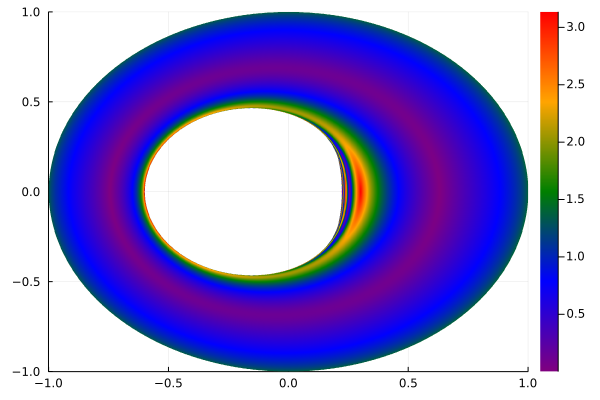

In [17]:
fig = Plots.heatmap(k2s, k3s, transpose(reshape(Z, N, N)), c=:rainbow, dpi=300)


Plots.savefig("~/Downloads/loss.png")

display(fig)
